In [1]:
import os.path
from os.path import join
import pandas as pd
import argparse
import pickle
import numpy as np
import math
import sys
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.ticker as plticker
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':20,
         'ytick.labelsize':20}
pylab.rcParams.update(params)

In [11]:
def open_equilibrium(path):
    dg = os.path.join('%s'%path, 'dg.pickle')
    dg_error = os.path.join('%s'%path, 'dg_error.pickle')
    a = open(dg, 'rb')
    dg_e = pickle.load(a)
    a.close()
    b = open(dg_error, 'rb')
    dg_error_e = pickle.load(b)
    b.close()
    
    return dg_e, dg_error_e

In [12]:
def plot_cum_dg(path,title, discard = 1, repeats=[1,2,3]):
    repeats = [1,2,3]
    dgs = []
    dgs_all = []
    for repeat in repeats:
        try:
            dg_e, dg_error_e = open_equilibrium('%s/%i'%(path, repeat))
            dgs.append(dg_e[-1])
            dgs_all.extend(dg_e)
        except OSError:
            continue
        x = list(range(discard+1,len(dg_e)+discard+1))                             
        plt.errorbar(x, dg_e, yerr=dg_error_e, alpha=0.5, fmt = '-o', mfc='w', mew=2.5, label='%i'%repeat, lw=5, ms=10)
        plt.xlabel('simulation time in ns',fontsize=20)
        plt.ylabel('ΔG in kcal/mol',fontsize=20)
        
        plt.title(title)
        plt.grid(True) 
    plt.legend()
    plt.show()
    dG = round(np.mean(dgs),2)
    dG_error = round(np.std(dgs),2)
    print(dG)
    print(dG_error)
    
    return dG, dG_error

# Edge_jmc29_jmc23

In [13]:
#edge = '%s/edge_ejm_44_ejm_55'%tyk2
ligandA = '/dfs6/pub/acaldaru/septop/hif2a/scaffold_hop/ff_2.1/jmc29/solvent'
ligandB = '/dfs6/pub/acaldaru/septop/hif2a/scaffold_hop/ff_2.1/jmc23/solvent'

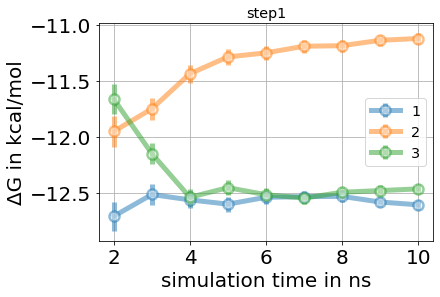

-12.06
0.67


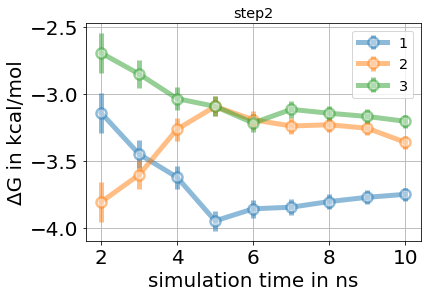

-3.44
0.23


In [14]:
#ddG binding site
#dihedral
protocols = ['step1', 'step2']
dgs = []
for p in protocols: 
    path = '%s'%(p)
    dg, dg_error = plot_cum_dg(path, p)
    dgs.append(dg)

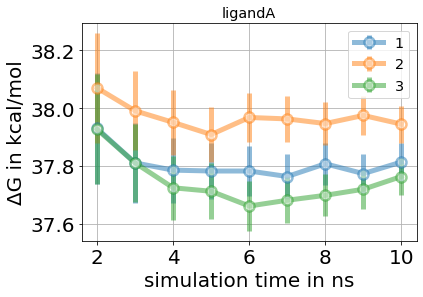

37.84
0.08


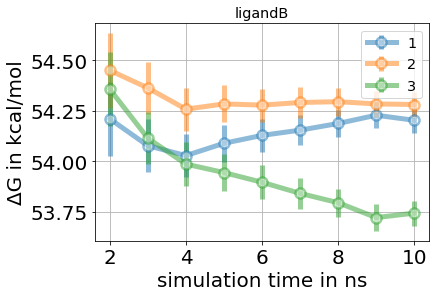

54.08
0.24


In [15]:
#ddG solvent
dg_solv_A, dg__solv_A_error = plot_cum_dg(ligandA, 'ligandA')
dg_solv_B, dg__solv_B_error = plot_cum_dg(ligandB, 'ligandB')

In [16]:
#dg_transfer_A = boresch_restraints(0.499, 87.58, 108.06, fc=83.68)
dg_transfer_A = -7.938
#dg_transfer_B = boresch_restraints(0.499, 99.40, 107.90, fc=83.68)
dg_transfer_B = 8.027

In [17]:
#ddG_site =  dg_transfer_B + dg_restrain + dg_turnon_vdw_B + dg_chargeB_unchargeA + dg_turnoff_vdw_A + dg_restrain + dg_transfer_A
print('ddG_site = ', dgs[0], '+', dgs[1])
ddG_site = sum(dgs) + dg_transfer_B + dg_transfer_A
print('ddG_site = ',round(ddG_site,2))
ddG_solvent = dg_solv_A - dg_solv_B
print('ddG_solvent = ', round(ddG_solvent,2))
ddG = ddG_site - ddG_solvent
print('ddG binding = ', round(ddG,2))

ddG_site =  -12.06 + -3.44
ddG_site =  -15.41
ddG_solvent =  -16.24
ddG binding =  0.83


In [18]:
error = round(np.sqrt((0.67**2)+(0.23**2)+(0.08**2)+(0.24**2)), 2)
print(error)

0.75


In [19]:
def format_plus_or_minus(num):
    return '\u00B1' + str(num)
#print(format_plus_or_minus(100))
print('ddG binding = ' , round(ddG,2), format_plus_or_minus(error))

ddG binding =  0.83 ±0.75
